<a href="https://colab.research.google.com/github/athadis/archana_INFO5502_Spring2022/blob/main/in_class_excercises/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

hours : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
months : [ 1  2  3  4  5  6  7  8  9 10 11 12]


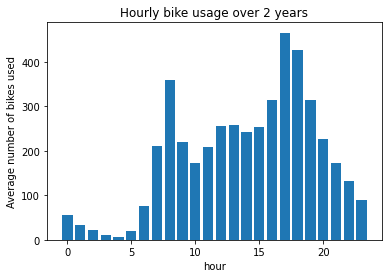

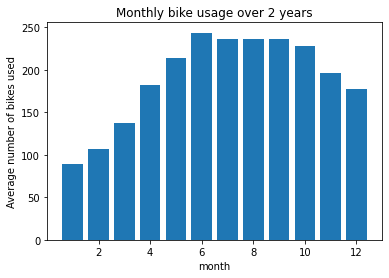

Features selected for later: ['hour', 'month', 'holiday', 'workingday', 'humidity', 'season', 'weather', 'atemp']
Model used is : RandomForestRegressor()

Model Score for Fold 1 is: 0.9807018284140882
Root mean square error for Fold 1 is : 110.00384182995187

Model Score for Fold 2 is: 0.9832777019945698
Root mean square error for Fold 2 is : 117.1314164597045

Model Score for Fold 3 is: 0.9809308794530899
Root mean square error for Fold 3 is : 104.94242292612242

Model Score for Fold 4 is: 0.9791294952369811
Root mean square error for Fold 4 is : 123.44059983159663

Model Score for Fold 5 is: 0.9796528397432304
Root mean square error for Fold 5 is : 124.95247944631173


Number of samples are : 1712 . Number of features are: 9 

Predicted the counts and saved as my_prediction.csv


In [12]:
import pandas
import numpy
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

train_data_frame=pandas.read_csv("train_luc.csv");
train_data_frame.describe()

def month_of_year(dt):
    return datetime.strptime(dt,"%Y-%m-%d %H:%M:%S").month

def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour

train_data_frame['hour'] = train_data_frame['datetime'].map(hour_of_day)
train_data_frame['month'] = train_data_frame['datetime'].map(month_of_year)
train_data_frame.head()

hours = numpy.unique(train_data_frame['hour'])
print("hours :",hours)

hours_mean = {}
for h in hours:
    temp_data = train_data_frame.loc[train_data_frame['hour'] == h]
    hours_mean[h] = temp_data['count'].mean()

months = numpy.unique(train_data_frame['month'])
print("months :", months)

months_mean = {}
for m in months:
    temp_data = train_data_frame.loc[train_data_frame['month'] == m]
    months_mean[m] = temp_data['count'].mean()

# plot the results hourly, monthly to get an idea. We might see peaks in the rush hours or summer months
plt.bar(hours,[hours_mean[h] for h in hours])
plt.title("Hourly bike usage over 2 years")
plt.ylabel("Average number of bikes used")
plt.xlabel("hour")
plt.show()

plt.bar(months, [months_mean[m] for m in months])
plt.title("Monthly bike usage over 2 years")
plt.ylabel("Average number of bikes used")
plt.xlabel("month")
plt.show()

# Feature selection - Selecting weather,atemp(feels like), hour, month, season since they can impact bike riding
cols = ['hour','month','holiday','workingday','humidity','season','weather','atemp']

# Model Selection - using RandomForest regressor
model = RandomForestRegressor(n_estimators = 100)

print("Features selected for later:",cols)
print("Model used is : {0}\n".format(model))

#Model tuning and Cross validation - using KFolds where K=5 which splits data into K-1 folds for training and 1 fold for testing
k_fold=KFold(5)
counter=1;

for result in k_fold.split(train_data_frame):
  # converting split datasets into dataframes
  new_train= train_data_frame.iloc[result[0]]
  new_test = train_data_frame.iloc[result[1]]

  y_train=new_train['count']
  x_train=new_train[cols]

  y_test=new_test['count']
  x_test=new_test[cols]

  model.fit(x_train, y_train)
  print("Model Score for Fold {0} is: {1}".format(counter,model.score(x_train, y_train)))

  y_pred = model.predict(x_test)

  # squared = False returns RMSE
  root_mean_square = mean_squared_error(y_test,y_pred,squared=False)
  print("Root mean square error for Fold {0} is : {1}\n".format(counter,root_mean_square))
  counter+=1

test_data_frame = pandas.read_csv('test_luc.csv', header=0)
print("\nNumber of samples are :",test_data_frame.shape[0] ,". Number of features are:",test_data_frame.shape[1],"\n")

test_data_frame['hour'] = test_data_frame['datetime'].map(hour_of_day)
test_data_frame['month'] = test_data_frame['datetime'].map(month_of_year)

test_data_frame.head()

model.fit(train_data_frame[cols], train_data_frame['count'])

pred_count = model.predict(test_data_frame[cols])

test_data_frame['count'] = pred_count

test_data_frame[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Predicted the counts and saved as my_prediction.csv")
